In [1]:
#importing dependencies
import pandas as pd
import numpy as np
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
file_path = 'resources/clean_listings.csv'
#  Import and read the csv.
df = pd.read_csv(file_path)

In [3]:
df.columns

Index(['id', 'host_response_rate', 'host_is_superhost',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'state', 'country_code', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'reviews_per_month', 'is_success'],
      dtype='object')

In [4]:
scores = df[['review_scores_rating',
   'review_scores_accuracy', 'review_scores_cleanliness',
   'review_scores_checkin', 'review_scores_communication',
   'review_scores_location', 'review_scores_value']].div(2)

In [5]:
scores['review_scores_rating'] = scores['review_scores_rating'].div(10)

In [6]:
scores_id = scores.join(df['id'],how='right')
scores_id

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,id
0,4.65,4.5,4.5,5.0,4.5,4.5,4.5,2515
1,4.90,5.0,5.0,5.0,5.0,5.0,5.0,2539
2,4.75,4.5,4.5,5.0,5.0,5.0,4.5,2595
3,3.95,3.5,3.5,4.5,4.5,4.0,3.5,15729
4,4.90,5.0,5.0,5.0,5.0,5.0,5.0,3330
...,...,...,...,...,...,...,...,...
15958,5.00,5.0,5.0,5.0,5.0,5.0,5.0,29610605
15959,5.00,5.0,5.0,5.0,5.0,5.0,5.0,29563829
15960,5.00,5.0,5.0,5.0,5.0,5.0,5.0,29628834
15961,5.00,5.0,5.0,5.0,5.0,5.0,5.0,29630759


In [7]:
scores.head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,4.65,4.5,4.5,5.0,4.5,4.5,4.5
1,4.90,5.0,5.0,5.0,5.0,5.0,5.0
2,4.75,4.5,4.5,5.0,5.0,5.0,4.5
3,3.95,3.5,3.5,4.5,4.5,4.0,3.5
4,4.90,5.0,5.0,5.0,5.0,5.0,5.0


In [8]:
scores["average_score"] = round(scores[list(scores)].mean(axis=1),2)

In [9]:
is_success = []
for i in scores['average_score']:
    is_success.append(int(i > 4.6))
scores['is_success'] = is_success

In [10]:
scores.head()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,average_score,is_success
0,4.65,4.5,4.5,5.0,4.5,4.5,4.5,4.59,0
1,4.90,5.0,5.0,5.0,5.0,5.0,5.0,4.99,1
2,4.75,4.5,4.5,5.0,5.0,5.0,4.5,4.75,1
3,3.95,3.5,3.5,4.5,4.5,4.0,3.5,3.92,0
4,4.90,5.0,5.0,5.0,5.0,5.0,5.0,4.99,1


In [11]:
csv_path = 'resources/scores.csv'
scores.to_csv(csv_path,index=False)

In [12]:
y = scores["is_success"]
X = df.drop(columns=['id','is_success','neighbourhood_cleansed','state','country_code','reviews_per_month'])

In [13]:
X['neighbourhood_group_cleansed'].value_counts()

Manhattan        7228
Brooklyn         6217
Queens           1960
Bronx             384
Staten Island     174
Name: neighbourhood_group_cleansed, dtype: int64

In [14]:
neighbourhood = {"Manhattan": 4,
                 "Brooklyn": 3,
                 "Queens": 2,
                 "Bronx": 1,
                 "Staten Island": 0}
X["neighbourhood"] = X["neighbourhood_group_cleansed"].apply(lambda x: neighbourhood[x])
X = X.drop(columns='neighbourhood_group_cleansed')

In [15]:
X['room_type'].value_counts()

Entire home/apt    9229
Private room       6428
Shared room         306
Name: room_type, dtype: int64

In [16]:
room = {'Entire home/apt': 2,
            'Private room': 1,
            'Shared room': 0}
X["room"] = X["room_type"].apply(lambda x: room[x])
X = X.drop(columns='room_type')

In [17]:
X.head()

,host_response_rate,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,neighbourhood,room
0,0.88,1,1,3,1.0,1.0,3.0,Real Bed,32,0.59,...,9.0,9.0,9.0,0,0,0.02,0,0,4,1
1,1.00,1,1,4,1.0,1.0,3.0,Real Bed,44,1.49,...,10.0,10.0,10.0,0,0,0.01,0,0,3,1
2,0.85,0,1,2,1.0,0.0,1.0,Real Bed,36,2.25,...,10.0,10.0,9.0,0,0,0.02,1,1,4,2
3,0.70,0,1,4,1.0,1.0,1.0,Real Bed,12,0.89,...,9.0,8.0,7.0,0,0,0.02,0,0,3,1
4,1.00,0,1,2,1.0,1.0,1.0,Real Bed,25,0.70,...,10.0,10.0,10.0,0,0,0.02,0,0,3,1


In [18]:
X['cancellation_policy'] = (X['cancellation_policy']*100).astype('int')
X['price'] = (X['price']*100).astype('float')

In [19]:
X['cancellation_policy'] = X['cancellation_policy'].astype('str')
policy = {'5':0,
 '4':1,
 '3':2,
 '2':3,
 '1':4,'0':5}    
X["cancellation_policy"] = X["cancellation_policy"].apply(lambda x: policy[x])

In [20]:
X['bed_type'].value_counts()

Real Bed         15683
Futon              108
Pull-out Sofa      100
Airbed              57
Couch               15
Name: bed_type, dtype: int64

In [21]:
bed = {'Real Bed': 4,
     'Futon': 3,
     'Pull-out Sofa': 2,
     'Airbed': 1,
     'Couch': 0}
X["bed_type"] = X["bed_type"].apply(lambda x: bed[x])

In [22]:
X = X.drop(columns=['host_is_superhost','number_of_reviews',                     
'review_scores_rating',          
'review_scores_accuracy',              
'review_scores_cleanliness',           
'review_scores_checkin',               
'review_scores_communication',         
'review_scores_location',              
'review_scores_value',
'host_response_rate'])

In [23]:
#features to csv
csv_path = 'resources/X.csv'
X.to_csv(csv_path,index=False)

#target to csv
csv_path = 'resources/y.csv'
y.to_csv(csv_path,index=False)

In [24]:
feature_names = X.columns
len(feature_names)

22

# Logistic Regression Model

In [25]:
#splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape

(11972, 22)

In [26]:
from sklearn.preprocessing import StandardScaler
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

In [27]:
#creating the model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)

In [28]:
#fitting the model
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [29]:
#making predictions
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,1,0
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [30]:
#accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
#0.8802305186670007 (w/ rs)
#0.877975444750689 (w/o rs, w/o superhost)
#0.884239538962666 (w/o rs, w/ superhost)
#0.6416938110749185 (score above 4.9)
#0.6649962415434728 (score above 4.75)
#0.7709847156101228 (score above 4.65)
#0.8068153345026309 (score above 4.6)

0.8068153345026309


In [31]:
#get the weights
w0 = classifier.intercept_[0]
w = w1, w2, w3, w4, w5,w6, w7, w8, w9, w10, w11, w12, w13, w14, w15, w16, w17, w18, w19, w20, w21, w22 = classifier.coef_[0]
# equation = "y = %f + (%f * x1) + (%f * x2) + (%f * x3) + (%f * x4)" % (w0, w1, w2, w3, w4, w5,w6, w7, w8, 
# w9, w10, w11, w12, w13, w14, w15, w16, w17, w18, w19, w20,
# w21, w22, w23)
# print(equation)

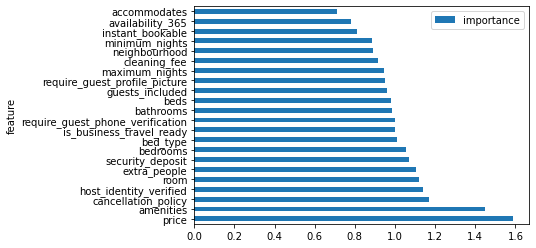

In [32]:
#graphing the importance of each feature
import math
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
 
from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()